In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('titanic_toy.csv')
df.sample(4)

,Age,Fare,Family,Survived
844,17.0,8.6625,0,0
191,19.0,13.0000,0,0
84,17.0,10.5000,0,1
721,17.0,7.0542,1,0


### Using pandas mean/median imputation

In [6]:
df.shape

(891, 4)

In [4]:
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [5]:
df.isnull().mean() * 100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [7]:
X = df.drop('Survived',axis = 1)

In [10]:
y = df['Survived']

In [11]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
X_train.shape,X_test.shape

((712, 3), (179, 3))

In [13]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

In [14]:
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)
X_train['Age_median'] = X_train['Age'].fillna(median_age)
X_train['Fare_mean'] = X_train['Fare'].fillna(mean_age)
X_train['Fare_median'] = X_train['Fare'].fillna(median_age)

In [15]:
X_train

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
331,45.5,28.5000,0,45.500000,45.5,28.500000,28.5000
733,23.0,13.0000,0,23.000000,23.0,13.000000,13.0000
382,32.0,7.9250,0,32.000000,32.0,7.925000,7.9250
704,26.0,7.8542,1,26.000000,26.0,7.854200,7.8542
813,6.0,31.2750,6,6.000000,6.0,31.275000,31.2750
...,...,...,...,...,...,...,...
106,21.0,7.6500,0,21.000000,21.0,7.650000,7.6500
270,NaN,31.0000,0,29.498846,28.0,31.000000,31.0000
860,41.0,NaN,2,41.000000,41.0,29.498846,28.0000
435,14.0,120.0000,3,14.000000,14.0,120.000000,120.0000


In [16]:
X_train.isnull().sum()

Age            140
Fare            36
Family           0
Age_mean         0
Age_median       0
Fare_mean        0
Fare_median      0
dtype: int64

After that you need to check the changes in variance. If the changes are drastic then don't use the technique, otherwise you can use it

In [21]:
#Variance will shrink after mean or median imputation as more values goes closer to mean or median respective to what you use.
print('Original Age variable variance: ', X_train['Age'].var())
print('Age variance after mean imputation: ', X_train['Age_mean'].var())
print('Age variance after median imputation', X_train['Age_median'].var())
print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare variance after mean imputation:  ', X_train['Fare_mean'].var())
print('Fare variance after median imputation: ', X_train['Fare_median'].var())

Original Age variable variance:  210.2517072477438
Age variance after mean imputation:  168.8519336687225
Age variance after median imputation 169.20731007048096
Original Fare variable variance:  2761.031434948639
Fare variance after mean imputation:   2621.6705110298403
Fare variance after median imputation:  2622.2135607276828


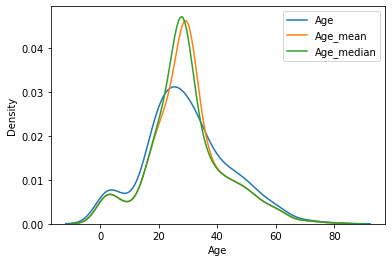

In [29]:
#After imputation there are more values in mean and median, that's why the curve is higher at those points
#So it's kind of a red flag
fig = plt.figure()
ax = fig.add_subplot(111)

sns.kdeplot(X_train['Age'],label = 'Age')

sns.kdeplot(X_train['Age_mean'], label = 'Age_mean')

sns.kdeplot(X_train['Age_median'], label = 'Age_median')

plt.legend()

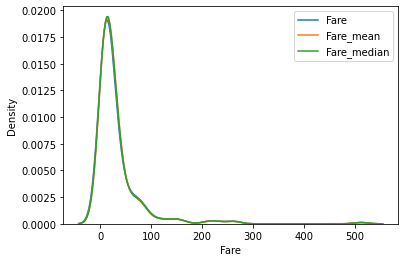

In [30]:
#If the distributions are same or almost same then it's a green flag
fig = plt.figure()
ax = fig.add_subplot(111)

sns.kdeplot(X_train['Fare'],label = 'Fare')

sns.kdeplot(X_train['Fare_mean'], label = 'Fare_mean')

sns.kdeplot(X_train['Fare_median'], label = 'Fare_median')

plt.legend()

In [31]:
X_train.cov()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,71.008529,70.916562
Fare,75.481375,2761.031435,18.599163,60.224654,63.938058,2761.031435,2761.031435
Family,-6.993325,18.599163,2.830892,-5.616299,-5.587710,17.659866,17.661074
Age_mean,210.251707,60.224654,-5.616299,168.851934,168.851934,57.026540,56.952682
Age_median,210.251707,63.938058,-5.587710,168.851934,169.207310,60.538695,60.458269
Fare_mean,71.008529,2761.031435,17.659866,57.026540,60.538695,2621.670511,2621.888037
Fare_median,70.916562,2761.031435,17.661074,56.952682,60.458269,2621.888037,2622.213561


In [35]:
X_train.corr()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,1.000000,0.091482,-0.319651,1.000000,1.000000,0.088692,0.088561
Fare,0.091482,1.000000,0.207193,0.088151,0.093496,1.000000,1.000000
Family,-0.319651,0.207193,1.000000,-0.256883,-0.255307,0.204992,0.204985
Age_mean,1.000000,0.088151,-0.256883,1.000000,0.998949,0.085711,0.085591
Age_median,1.000000,0.093496,-0.255307,0.998949,1.000000,0.090894,0.090764
Fare_mean,0.088692,1.000000,0.204992,0.085711,0.090894,1.000000,0.999979
Fare_median,0.088561,1.000000,0.204985,0.085591,0.090764,0.999979,1.000000


<AxesSubplot:>

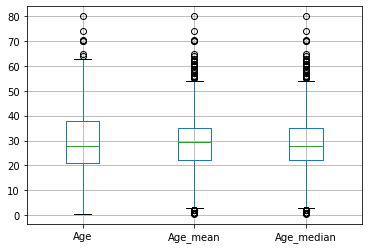

In [41]:
#introduces more outliers as the IQR gets shrank
X_train[['Age','Age_mean','Age_median']].boxplot()

<AxesSubplot:>

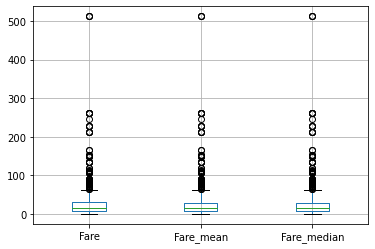

In [40]:
#The no. of outliers are same as less than 5% values were missing in the original data
X_train[['Fare','Fare_mean','Fare_median']].boxplot()

### Using sklearn mean / median imputation

In [42]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [43]:
imputer1 = SimpleImputer(strategy='mean')
imputer2 = SimpleImputer(strategy='median')

In [46]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [47]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(), ['Age']),
                                ('imputer2', SimpleImputer(strategy='median'),
                                 ['Fare'])])

In [48]:
trf.named_transformers_['imputer1'].statistics_

array([29.49884615])

In [49]:
trf.named_transformers_['imputer2'].statistics_

array([14.4])

In [50]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [51]:
X_train

array([[ 45.5   ,  28.5   ,   0.    ],
       [ 23.    ,  13.    ,   0.    ],
       [ 32.    ,   7.925 ,   0.    ],
       ...,
       [ 41.    ,  14.4   ,   2.    ],
       [ 14.    , 120.    ,   3.    ],
       [ 21.    ,  77.2875,   1.    ]])